In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from newGraphDiscovery import GraphDiscoveryNew
import numpy as onp
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv("churn.csv",index_col=0)
node_names=df.columns
X=df.to_numpy()
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [27]:
X

array([[  1. ,  78.5,  67. ,   0. ,  73.2],
       [  1. ,  78.5,  67. ,   1. ,  69.2],
       [  1. ,  78.5,  67. ,   1. ,  69. ],
       ...,
       [203. ,  62. ,  66. ,   1. ,  61. ],
       [204. ,  62.5,  63. ,   0. ,  66.5],
       [204. ,  62.5,  63. ,   1. ,  57. ]])

In [28]:
df

,Family ID,Father Height,Mother Height,Gender,Height
0,1,78.5,67.0,0,73.2
1,1,78.5,67.0,1,69.2
2,1,78.5,67.0,1,69.0
3,1,78.5,67.0,1,69.0
4,2,75.5,66.5,0,73.5
...,...,...,...,...,...
885,203,62.0,66.0,0,64.0
886,203,62.0,66.0,1,62.0
887,203,62.0,66.0,1,61.0
888,204,62.5,63.0,0,66.5


In [29]:
beta=onp.array([0.1,0.01,0.001])
graph_discovery=GraphDiscoveryNew(X.T,beta,onp.array(node_names),l=1)

Computing kernel matrix
Performing eigenvalue decomposition on matrix of shape (890, 890)


PCA reduced dimension to 890
Family ID has ancestors with linear kernel (Z test=0.01)
['Father Height'] 

PCA reduced dimension to 890
Father Height has ancestors with linear kernel (Z test=0.01)
['Gender'] 

PCA reduced dimension to 890
Mother Height has ancestors with linear kernel (Z test=0.01)
['Gender'] 

PCA reduced dimension to 890
Gender has ancestors with linear kernel (Z test=0.01)
['Height'] 

PCA reduced dimension to 890
Height has ancestors with linear kernel (Z test=0.01)
['Gender'] 



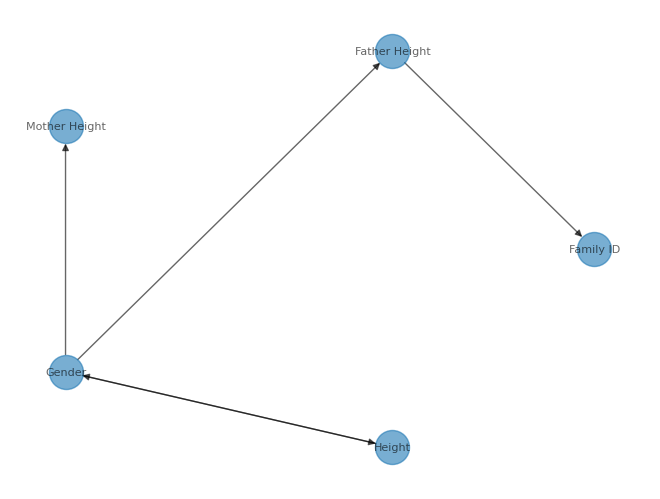

In [30]:
for node in graph_discovery.names:
    graph_discovery.find_ancestors(node,1e-1,kPCA='fixed number',number_of_eigenvectors=890)
graph_discovery.plot_graph()